## End to End heart-disease

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# check for missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
## plot graph between age and sex 

pd.crosstab(heart_disease["target"],heart_disease["sex"])

sex,0,1
target,,
0,24,114
1,72,93


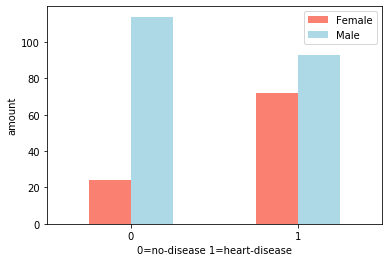

In [16]:
pd.crosstab(heart_disease['target'],heart_disease['sex']).plot(kind="bar",color=["salmon","lightblue"])
plt.xlabel("0=no-disease 1=heart-disease")
plt.ylabel('amount')
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

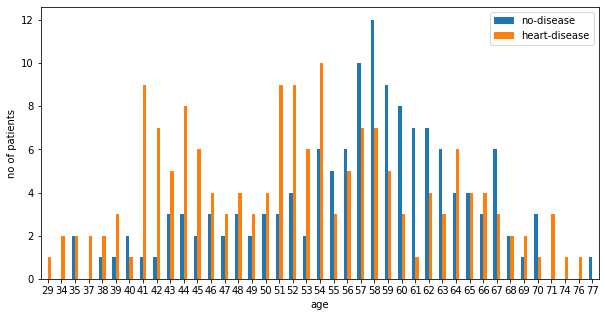

In [21]:
# compare age vs target column

pd.crosstab(heart_disease['age'],heart_disease["target"]).plot(kind="bar",figsize=(10,5))
plt.xlabel("age")
plt.ylabel('no of patients')
plt.legend(["no-disease","heart-disease"])
plt.xticks(rotation=0);

In [24]:
# split the data into X features and y labels 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split into train and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [35]:
# try different models 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic_Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random_forest":RandomForestClassifier()
         }

def fit_and_score(models,X_train,X_test,y_train,y_test):
    model_scores = {}
    for name,model in models.items():
        # fit the model 
        model.fit(X_train,y_train)
        # evalaute score 
        model_scores[name] = model.score(X_test,y_test)
        
fit_and_score(models,X_train,X_test,y_train,y_test)

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Regression Data set 

#### Car sales data set 

In [2]:
# import data 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

car_sales = pd.read_csv("9.1 car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
# check for missing values 

car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [4]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [12]:
car_sales.dropna(subset=["Price"],inplace=True)

In [14]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [21]:
## fill missing values with impute method

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant",fill_value=["Honda","White"])
num_imputer = SimpleImputer(strategy="mean")
doors_imputer = SimpleImputer(strategy="constant",fill_value=4.0)

cat_features = ["Make","Colour"]
num_features = ["Odometer (KM)"]
doors_features = ["Doors"]

transformer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                                 ("num_imputer",num_imputer,num_features),
                                 ("doors_imputer",doors_imputer,doors_features)])

transformed_X = transformer.fit_transform(car_sales)
transformed_X

array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [23]:
car_sales_filled = pd.DataFrame(transformed_X,columns=["Make","Colour","Odometer (KM)","Doors"])
car_sales_filled

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
945,Toyota,Black,35820,4
946,Honda,White,155144,3
947,Nissan,Blue,66604,4
948,Honda,White,215883,4


In [25]:
car_sales_filled.dtypes

Make             object
Colour           object
Odometer (KM)    object
Doors            object
dtype: object

In [26]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [32]:
car_sales_filled["Odometer (KM)"] = car_sales_filled["Odometer (KM)"].astype('int')
car_sales_filled["Doors"] = car_sales_filled["Doors"].astype('int')

In [51]:
# convert object to numeric using one hot encoder 

from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make","Colour"]
one_hot = OneHotEncoder()

transformer2 = ColumnTransformer([("one_hot",one_hot,categorical_features)])

X_transformed = transformer2.fit_transform(car_sales_filled)

In [36]:
X_transformed

array([['Honda', 'White', 35431.0, 4],
       ['BMW', 'Blue', 192714.0, 5],
       ['Honda', 'White', 84714.0, 4],
       ...,
       ['Nissan', 'Blue', 66604.0, 4],
       ['Honda', 'White', 215883.0, 4],
       ['Toyota', 'Blue', 248360.0, 4]], dtype=object)

In [44]:
df = pd.DataFrame(X_transformed,columns=["Make","Colour","Odometer (KM)","Doors"])
df.dtypes

Make             object
Colour           object
Odometer (KM)    object
Doors            object
dtype: object

In [46]:
df["Odometer (KM)"] = df["Odometer (KM)"].astype('int')
df["Doors"] = df["Doors"].astype('int')

In [48]:
df.dtypes

Make             object
Colour           object
Odometer (KM)     int32
Doors             int32
dtype: object

In [54]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make","Colour"]

one_hot = OneHotEncoder()

transformer2 = ColumnTransformer([("one_hot",one_hot,categorical_features)])

X_transformed = transformer2.fit_transform(df)
X_transformed

<950x9 sparse matrix of type '<class 'numpy.float64'>'
	with 1900 stored elements in Compressed Sparse Row format>

In [57]:
df = pd.DataFrame(X_transformed)
df

,0
0,"(0, 1)\t1.0\n (0, 8)\t1.0"
1,"(0, 0)\t1.0\n (0, 5)\t1.0"
2,"(0, 1)\t1.0\n (0, 8)\t1.0"
3,"(0, 3)\t1.0\n (0, 8)\t1.0"
4,"(0, 2)\t1.0\n (0, 5)\t1.0"
...,...
945,"(0, 3)\t1.0\n (0, 4)\t1.0"
946,"(0, 1)\t1.0\n (0, 8)\t1.0"
947,"(0, 2)\t1.0\n (0, 5)\t1.0"
948,"(0, 1)\t1.0\n (0, 8)\t1.0"


In [64]:

# split into train and test set 

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_transformed,car_sales["Price"],test_size=0.2)

# chhoose a model 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# fit the model 

model.fit(X_train,y_train)

# check the score 

model.score(X_test,y_test)

0.14835733571723264

In [68]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [75]:
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = boston["target"]
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [76]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [77]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [84]:
# split into features and labels 

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# split into train and test set 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# fit the model

model.fit(X_train,y_train)

# predict the model 

y_preds = model.predict(X_test)
y_preds[:10]



array([32.263, 23.495, 34.067, 15.027, 14.703, 14.348, 31.892, 21.511,
       13.671, 12.983])

In [89]:
# evalaution metrics 

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

def evaluate_score(y_true,y_preds):
    """
    evaluates a score based on true labels and prediction labels 
    """
    r2 = r2_score(y_true,y_preds)
    mse = mean_absolute_error(y_true,y_preds)
    msqe = mean_squared_error(y_true,y_preds)
    
    print(f"The r2-score is:{r2}")
    print(f"The mean-absolute-error is:{mse}")
    print(f"The mean-squared-error is:{msqe}")
    
evaluate_score(y_test,y_preds)

The r2-score is:0.7021150247736339
The mean-absolute-error is:2.659833333333331
The mean-squared-error is:25.94563159803921
